In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

#from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Convolution1D
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import re

import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

from google.colab import drive



import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import sys
import warnings

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Input Data

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

# load data

data= pd.read_csv('drive/My Drive/TCC/Toxic comment data/train.csv')
data.shape


(159571, 8)

In [0]:
labels=data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
labels.head

<bound method NDFrame.head of         toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]>

In [0]:
#do not execute
#data cleaning: removing punctuations, numbers, and multiple spaces
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
#creating input and output set
X = data['comment_text']
#sentences = list(data["comment_text"])
#for sen in sentences:
#    X.append(preprocess_text(sen))

y = labels.values


In [0]:

len(X)

159571

#CNN(randomized) with cross_entropy loss

80:20

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50, random_state=42)

Preparing data for model

In [0]:
print(len(X_train))

127656


In [447]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

AttributeError: ignored

In [0]:
print(X_train.size)

25531200


In [448]:
model = Sequential()
model.add(Embedding(vocab_size, 6, input_length=200))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
#model.add(Dropout(0.25))
#model.add(Conv1D(100, 3, activation='relu'))
model.add(Conv1D(100, 4, activation='relu'))
model.add(MaxPooling1D(4))
#model.add(Dropout(0.05))
model.add(Conv1D(100, 5, activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Dropout(0.015))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 200, 6)            1099188   
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 198, 64)           1216      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 66, 64)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 63, 100)           25700     
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 15, 100)           0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 11, 100)           50100     
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 5, 100)          

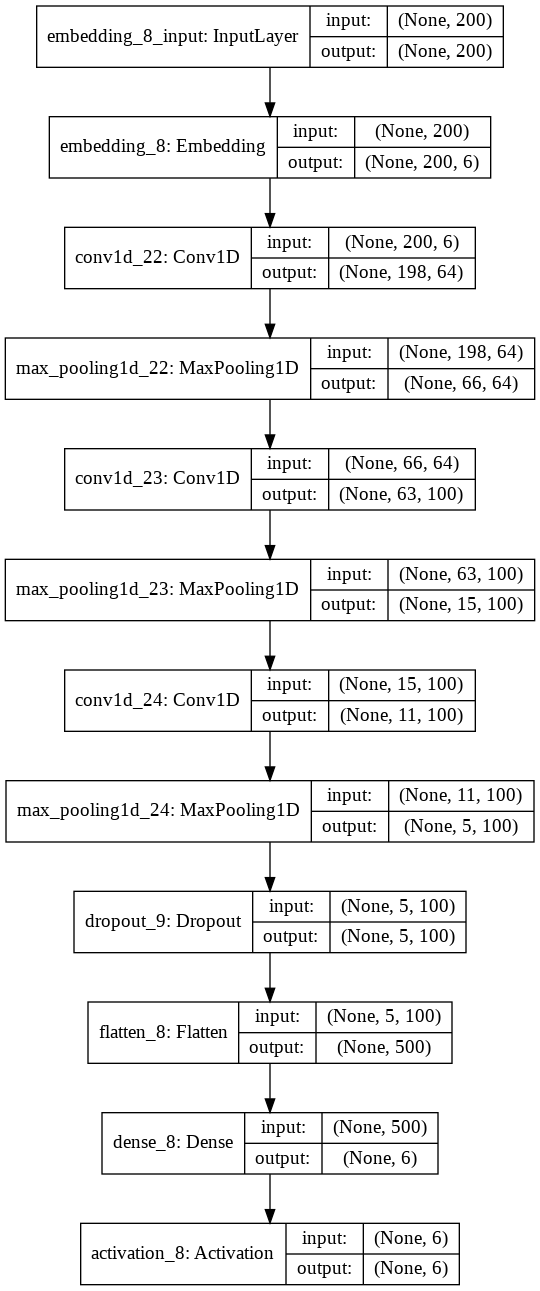

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot7.png', show_shapes=True, show_layer_names=True)

In [0]:
from google.colab import files
files.download('model_plot7.png')

In [449]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #adding attribute metrics helps in using evaluate to know accuracy etc 
history=model.fit(X_train, y_train,
                        epochs=5,
                        verbose=True,
                        validation_data=(X_val, y_val),
                        batch_size=16)


Train on 127656 samples, validate on 79786 samples
Epoch 1/5
127656/127656 [==============================] - 102s 798us/step - loss: 0.0661 - accuracy: 0.9781 - val_loss: 0.0547 - val_accuracy: 0.9805
Epoch 2/5
127656/127656 [==============================] - 102s 796us/step - loss: 0.0523 - accuracy: 0.9814 - val_loss: 0.0502 - val_accuracy: 0.9822
Epoch 3/5
127656/127656 [==============================] - 104s 814us/step - loss: 0.0496 - accuracy: 0.9822 - val_loss: 0.0489 - val_accuracy: 0.9824
Epoch 4/5
127656/127656 [==============================] - 101s 794us/step - loss: 0.0474 - accuracy: 0.9828 - val_loss: 0.0496 - val_accuracy: 0.9824
Epoch 5/5
127656/127656 [==============================] - 105s 820us/step - loss: 0.0455 - accuracy: 0.9832 - val_loss: 0.0470 - val_accuracy: 0.9832


In [0]:
predictions=model.predict([X_test])


In [0]:
predictionsT=(predictions>0.5)

In [0]:
print('Accuracy score: ', accuracy_score(y_test, predictionsT))
print('Precision score: ', precision_score(y_test, predictionsT, average='micro'))
print('Recall score: ', recall_score(y_test, predictionsT, average='weighted'))
print('F1 score: ', f1_score(y_test, predictionsT, average='weighted'))

Accuracy score:  0.9289716112051137
Precision score:  0.8303588811733402
Recall score:  0.7313100137174211
F1 score:  0.7596467298346988


In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

79785/79785 [==============================] - 5s 65us/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.036970097885402384
Test accuracy: 0.9857439398765564


In [0]:
history.history

{'accuracy': [0.9781545,
  0.98148966,
  0.9820694,
  0.9826,
  0.98311204,
  0.9835895,
  0.98397523,
  0.98444057],
 'loss': [0.06561765542470442,
  0.05213285423762722,
  0.04950838548005052,
  0.04747284414340018,
  0.04550718474046791,
  0.04396148573117378,
  0.04259935288820461,
  0.041273400273145945],
 'val_accuracy': [0.9816901683807373,
  0.9821206331253052,
  0.982185423374176,
  0.9826652407646179,
  0.9829913377761841,
  0.9827824831008911,
  0.9833340048789978,
  0.9838272333145142],
 'val_loss': [0.05183583358851332,
  0.05008480149987236,
  0.049441538438645634,
  0.04802090012690717,
  0.04938785764182891,
  0.046961132791632436,
  0.04681197444745042,
  0.045786808910706814]}

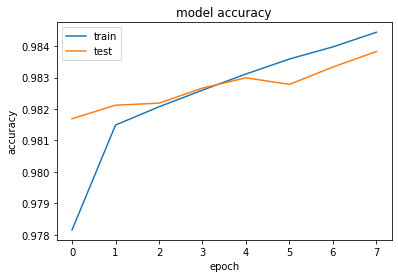

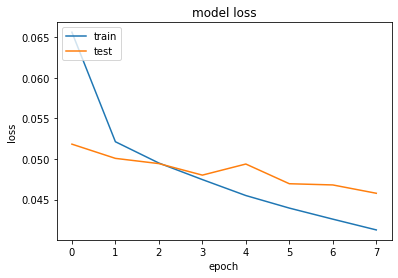

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

On Twitter Data

In [0]:
twi=pd.read_csv('drive/My Drive/TCC/Twitter data/testPostAnn.csv')
twi.shape

(1000, 7)

In [0]:
print(twi.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')


In [0]:
#data=data.dropna(0, 'any')
twi=twi.fillna(0)
twi.isnull().sum()
#data.head(5)
#data.shape

text             0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [0]:
twi.astype({"toxic":int, "severe_toxic":int, "threat":int, "identity_hate":int, "obscene":int, "insult":int})

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,You mean to say Ankit Sharma who was stabbed 4...,0,0,0,0,0,0
1,@sardesairajdeep Not rooting for Kapil Mishra ...,0,0,0,0,0,0
2,"RT @OpIndia_com: After WSJ, Jansatta misquotes...",0,0,0,0,0,0
3,RT @Saurabhk4u: When #SwaraBhasker and #Jafrab...,1,0,0,0,0,1
4,RT @abhishekangad: Intelligence Bureau Securit...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,RT @JantaKaReporter: Centre should be held res...,0,0,0,0,0,0
996,"RT @tufailelif: ""Kapil Mishra, a local politic...",0,0,0,0,0,0
997,RT @zkhan1259: How do you sleep at night @Delh...,0,0,0,0,0,0
998,RT @ANI: #WATCH Delhi: National Security Advis...,0,0,0,0,0,0


In [0]:
twi_X=twi['text']
twi_Y=twi[['toxic','severe_toxic', 'threat', 'obscene', 'insult', 'identity_hate']]

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(twi_X)

X_twi = tokenizer.texts_to_sequences(twi_X)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_twi = pad_sequences(X_twi, padding='post', maxlen=maxlen)


In [0]:
predictions=model.predict([X_twi])

In [0]:
predictions=(predictions>0.5)

In [0]:
print('Accuracy score: ', accuracy_score(twi_Y, predictions))
print('Precision score: ', precision_score(twi_Y, predictions, average='micro'))
print('Recall score: ', recall_score(twi_Y, predictions, average='micro'))
print('F1 score: ', f1_score(twi_Y, predictions, average='micro'))

Accuracy score:  0.726
Precision score:  0.1342281879194631
Recall score:  0.06872852233676977
F1 score:  0.09090909090909091


In [0]:
twi.to_csv('testPostAnn1.csv')
!cp testPostAnn1.csv "drive/My Drive/TCC/Twitter data"

In [0]:
model.save('drive/My Drive/TCC/Models/cnn_rand_crossentropy.h5')


CNN(FIXED) with binary_cross_entropy loss

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/TCC/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.25))
#model.add(Conv1D(100, 3, activation='relu'))
model.add(Conv1D(100, 4, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Dropout(0.05))
model.add(Conv1D(100, 5, activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Dropout(0.01))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 100)          18319800  
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 198, 64)           19264     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 66, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 66, 64)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 63, 100)           25700     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 15, 100)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 100)          

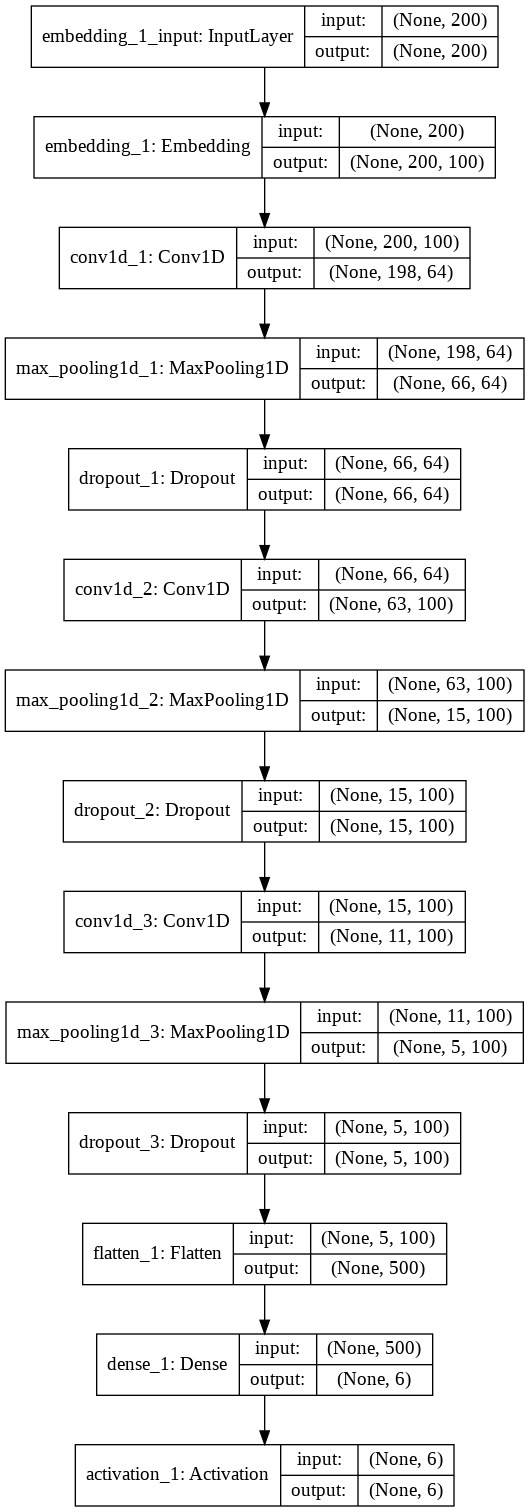

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='fixed_model_plot2(trainable=false).png', show_shapes=True, show_layer_names=True)

In [0]:
from google.colab import files
files.download('fixed_model_plot2(trainable=false).png')

In [0]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #adding attribute metrics helps in using evaluate to know accuracy etc 
history=model.fit(X_train, y_train,
                        epochs=8,
                        verbose=True,
                        validation_data=(X_val, y_val),
                        batch_size=16)
predictions=model.predict([X_test])


Train on 127656 samples, validate on 79786 samples
Epoch 1/8
127656/127656 [==============================] - 83s 651us/step - loss: 0.0695 - accuracy: 0.9769 - val_loss: 0.0572 - val_accuracy: 0.9802
Epoch 2/8
127656/127656 [==============================] - 81s 635us/step - loss: 0.0586 - accuracy: 0.9798 - val_loss: 0.0543 - val_accuracy: 0.9809
Epoch 3/8
127656/127656 [==============================] - 84s 662us/step - loss: 0.0562 - accuracy: 0.9805 - val_loss: 0.0529 - val_accuracy: 0.9813
Epoch 4/8
127656/127656 [==============================] - 84s 658us/step - loss: 0.0548 - accuracy: 0.9807 - val_loss: 0.0531 - val_accuracy: 0.9809
Epoch 5/8
127656/127656 [==============================] - 81s 633us/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0510 - val_accuracy: 0.9819
Epoch 6/8
127656/127656 [==============================] - 84s 658us/step - loss: 0.0533 - accuracy: 0.9811 - val_loss: 0.0508 - val_accuracy: 0.9818
Epoch 7/8
127656/127656 [========================

In [0]:
predictions=(predictions>0.5)

In [0]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions, average='weighted'))

Accuracy score:  0.9229930438052265
Precision score:  0.8166419179720674
Recall score:  0.6562071330589849
F1 score:  0.7134315086266989


In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

79785/79785 [==============================] - 5s 64us/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.04899741635459583
Test accuracy: 0.9824515581130981


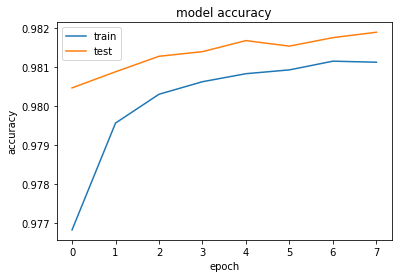

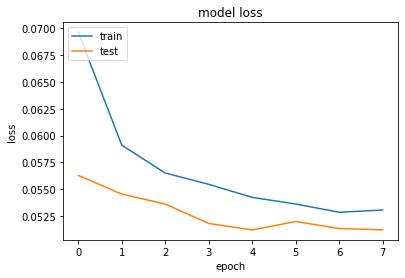

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Twitter Data

In [0]:
predictions=model.predict([X_twi])

In [0]:
predictions=(predictions>0.5)

In [0]:
print('Accuracy score: ', accuracy_score(twi_Y, predictions))
print('Precision score: ', precision_score(twi_Y, predictions, average='micro'))
print('Recall score: ', recall_score(twi_Y, predictions, average='micro'))
print('F1 score: ', f1_score(twi_Y, predictions, average='micro'))

Accuracy score:  0.732
Precision score:  0.152
Recall score:  0.06529209621993128
F1 score:  0.09134615384615384


In [0]:
#saving model
#model_save_name = 'cnn_fixed_binarycrossentropy.h5'
model.save('drive/My Drive/TCC/Models/cnn_fixed_binarycrossentropy.h5')
#!cp model_save_name 'My Drive/TCC/Models'

#FOCAL LOSS with CNN(fixed)

In [0]:
def focal_loss(gamma=2., alpha=4.):

    gamma = float(gamma)
    alpha = float(alpha)

    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/TCC/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.25))
#model.add(Conv1D(100, 3, activation='relu'))
model.add(Conv1D(100, 4, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Dropout(0.05))
model.add(Conv1D(100, 5, activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Dropout(0.015))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 100)          18319800  
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 198, 64)           19264     
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 66, 64)            0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 66, 64)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 63, 100)           25700     
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 15, 100)           0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 15, 100)         

In [0]:
model.compile(optimizer='adam', loss=focal_loss(alpha=1), metrics=['accuracy']) #adding attribute metrics helps in using evaluate to know accuracy etc 
history=model.fit(X_train, y_train,
                        epochs=8,
                        verbose=True,
                        validation_data=(X_val, y_val),
                        batch_size=16)

Train on 127656 samples, validate on 79786 samples
Epoch 1/8
127656/127656 [==============================] - 92s 721us/step - loss: 7.6324e-12 - accuracy: 0.4590 - val_loss: 9.4881e-12 - val_accuracy: 0.6212
Epoch 2/8
127656/127656 [==============================] - 91s 711us/step - loss: 5.9477e-12 - accuracy: 0.4576 - val_loss: 7.6141e-12 - val_accuracy: 0.6200
Epoch 3/8
127656/127656 [==============================] - 91s 711us/step - loss: 4.9231e-12 - accuracy: 0.4580 - val_loss: 6.3508e-12 - val_accuracy: 0.6207
Epoch 4/8
127656/127656 [==============================] - 92s 720us/step - loss: 4.1348e-12 - accuracy: 0.4585 - val_loss: 5.4507e-12 - val_accuracy: 0.6204
Epoch 5/8
127656/127656 [==============================] - 90s 706us/step - loss: 3.5578e-12 - accuracy: 0.4575 - val_loss: 4.7806e-12 - val_accuracy: 0.6218
Epoch 6/8
127656/127656 [==============================] - 89s 700us/step - loss: 3.1400e-12 - accuracy: 0.4596 - val_loss: 4.2589e-12 - val_accuracy: 0.6228
E

In [0]:
predictions=model.predict([X_test])

In [0]:
predictions=(predictions>0.9999)

In [0]:
print(predictions)

[[ True False  True False  True False]
 [ True False  True False  True False]
 [ True  True  True False  True  True]
 ...
 [ True False  True False  True False]
 [ True False False False  True False]
 [ True False False False  True False]]


In [169]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted', zero_division=1))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions, average='weighted'))

Accuracy score:  0.7733533872281757
Precision score:  0.7648944324639947
Recall score:  0.015603566529492456
F1 score:  0.008880865177610832


In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

79785/79785 [==============================] - 5s 66us/step


In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 8.368783043470233e-08
Test accuracy: 0.9933696985244751


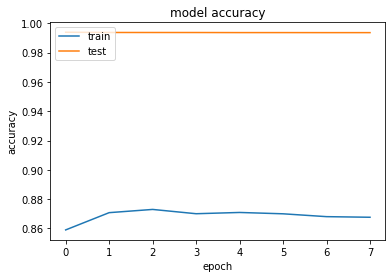

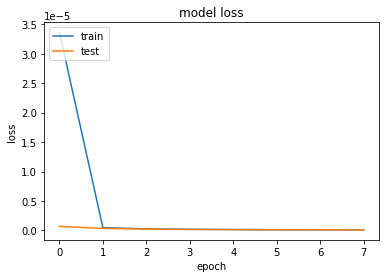

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [0]:
#multilabel confusion metrics
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
#predictions = model.predict(X_test, batch_size=1000)

LABELS = ['Normal','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
#confusion_matrix = 
metrics.multilabel_confusion_matrix(max_test, max_predictions)

#plt.figure(figsize=(5, 5))
#sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
#plt.title("Confusion matrix", fontsize=20)
#plt.ylabel('True label', fontsize=20)
#plt.xlabel('Predicted label', fontsize=20)
#plt.show()


array([[[    0,   471],
        [   58, 79256]],

       [[79461,    56],
        [  268,     0]],

       [[79770,     0],
        [   15,     0]],

       [[79626,     2],
        [  157,     0]],

       [[79754,     0],
        [   31,     0]]])

In [0]:
max_test.shape

(79785,)

In [0]:
predictions.shape

(79785, 6)

In [0]:
metrics.classification_report(y_test, predictions)

ValueError: ignored

Twitter Data

In [0]:
predictions=model.predict([X_twi])

In [211]:
print(predictions)

[[0.9997785  0.9995793  0.9996934  0.9994687  0.9997405  0.99955845]
 [0.9997227  0.99955004 0.9996512  0.99935627 0.9996897  0.9995297 ]
 [0.9997774  0.9995794  0.99969345 0.9994701  0.99974084 0.9995576 ]
 ...
 [0.9997878  0.99958    0.9997061  0.9994893  0.99975    0.9995567 ]
 [0.99978065 0.9995806  0.99969804 0.99947155 0.9997444  0.99956155]
 [0.99979883 0.9995922  0.99971986 0.99950475 0.99975896 0.99956036]]


In [0]:
predictions=(predictions>0.9998)

In [213]:
print('Accuracy score: ', accuracy_score(twi_Y, predictions))
print('Precision score: ', precision_score(twi_Y, predictions, average='weighted', zero_division=1))
print('Recall score: ', recall_score(twi_Y, predictions, average='weighted'))
print('F1 score: ', f1_score(twi_Y, predictions, average='weighted'))

Accuracy score:  0.779
Precision score:  0.5199462124607799
Recall score:  0.020618556701030927
F1 score:  0.036763275627309855


In [0]:
model.save('drive/My Drive/TCC/Models/cnn_fixed_focal.h5')

FOCAL LOSS WITH CNN(RAND)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

In [217]:
model = Sequential()
model.add(Embedding(vocab_size, 6, input_length=200))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.25))
#model.add(Conv1D(100, 3, activation='relu'))
model.add(Conv1D(100, 4, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Dropout(0.05))
model.add(Conv1D(100, 5, activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Dropout(0.015))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 6)            1099188   
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 198, 64)           1216      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 66, 64)            0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 66, 64)            0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 63, 100)           25700     
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 15, 100)           0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 15, 100)         

In [218]:
model.compile(optimizer='adam', loss=focal_loss(alpha=1), metrics=['accuracy']) #adding attribute metrics helps in using evaluate to know accuracy etc 
history=model.fit(X_train, y_train,
                        epochs=8,
                        verbose=True,
                        validation_data=(X_val, y_val),
                        batch_size=16)



Train on 127656 samples, validate on 79786 samples
Epoch 1/8
127656/127656 [==============================] - 102s 802us/step - loss: 1.8745e-05 - accuracy: 0.6541 - val_loss: 4.9106e-09 - val_accuracy: 0.9516
Epoch 2/8
127656/127656 [==============================] - 106s 827us/step - loss: 1.4748e-09 - accuracy: 0.6802 - val_loss: 1.7511e-10 - val_accuracy: 0.9938
Epoch 3/8
127656/127656 [==============================] - 104s 814us/step - loss: 6.8888e-11 - accuracy: 0.7442 - val_loss: 2.6370e-11 - val_accuracy: 0.9942
Epoch 4/8
127656/127656 [==============================] - 103s 810us/step - loss: 1.8469e-11 - accuracy: 0.7392 - val_loss: 1.2869e-11 - val_accuracy: 0.9942
Epoch 5/8
127656/127656 [==============================] - 103s 809us/step - loss: 1.0536e-11 - accuracy: 0.7444 - val_loss: 8.5195e-12 - val_accuracy: 0.9942
Epoch 6/8
127656/127656 [==============================] - 105s 826us/step - loss: 7.4662e-12 - accuracy: 0.7414 - val_loss: 6.3658e-12 - val_accuracy: 0.

In [0]:
predictions=model.predict([X_test])

In [312]:
print(predictions)

[[0.99975765 0.9995713  0.99970603 0.9994358  0.99970496 0.99956113]
 [0.9997579  0.9995711  0.99970603 0.9994357  0.9997048  0.99956095]
 [0.9996567  0.9994863  0.99960613 0.999213   0.99959546 0.9993985 ]
 ...
 [0.99974775 0.9995667  0.9997035  0.9994111  0.999699   0.9995619 ]
 [0.999758   0.9995713  0.99970615 0.9994363  0.9997047  0.9995606 ]
 [0.99975854 0.9995707  0.99970573 0.999436   0.9997044  0.9995597 ]]


In [0]:
predictions=(predictions>0.999757777)

In [314]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted', zero_division=1))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions, average='weighted'))

Accuracy score:  0.615378830607257
Precision score:  0.6260172632614466
Recall score:  0.22685185185185186
F1 score:  0.0973170073724098


In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 8.225708918115843e-08
Test accuracy: 0.9940966367721558


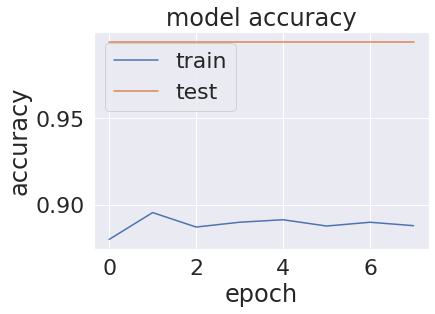

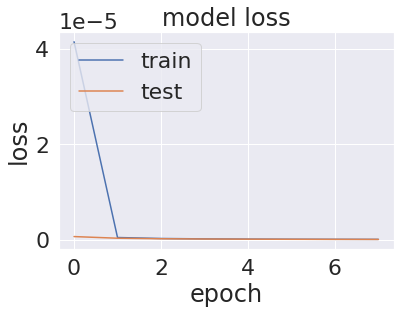

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Twitter Data

In [0]:
predictions=model.predict([X_twi])

In [442]:
print(predictions)

[[0.99975806 0.99957114 0.9997059  0.9994358  0.99970466 0.9995606 ]
 [0.9997587  0.99957067 0.9997056  0.9994361  0.99970436 0.9995595 ]
 [0.99975765 0.9995713  0.99970615 0.9994357  0.99970496 0.9995612 ]
 ...
 [0.9997572  0.9995713  0.99970627 0.9994352  0.99970484 0.9995616 ]
 [0.9997576  0.9995715  0.99970627 0.9994358  0.99970496 0.99956137]
 [0.9997566  0.99957186 0.99970627 0.99943334 0.99970496 0.99956214]]


In [0]:
predictions=(predictions>0.9997577)

In [444]:
print('Accuracy score: ', accuracy_score(twi_Y, predictions))
print('Precision score: ', precision_score(twi_Y, predictions, average='micro', zero_division=1))
print('Recall score: ', recall_score(twi_Y, predictions, average='micro'))
print('F1 score: ', f1_score(twi_Y, predictions, average='micro'))

Accuracy score:  0.57
Precision score:  0.20238095238095238
Recall score:  0.23367697594501718
F1 score:  0.21690590111642744


In [0]:
model.save('drive/My Drive/TCC/Models/cnn_rand_focal.h5')


Binary Classification